In [ ]:
import pandas as pd

dust=pd.read_excel('dust.xlsx')
dust.head()

dust.rename(columns={'날짜' : 'date', '아황산가스' : 'so2', '일산화탄소' : 'co', '오존' : 'o3', '이산화질소' : 'no2'}, inplace=True)
dust.head()

dust['date']=dust['date'].str[:11]
dust.head()

dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

dust['Day']=dust['date'].dt.day
dust.head()

#dust=dust[['date', 'Year', 'Month', 'Day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]
dust.head()

dust.isnull().sum()

dust=dust.fillna(method='pad')
dust.head()

/tmp/ipython-input-1726983252.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust=dust.fillna(method='pad')


,date,so2,co,o3,no2,PM10,PM2.5,Day
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0,1
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0,1
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0,1
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0,1
4,2021-01-01,0.004,0.5,0.010,0.026,17.0,14.0,1


In [ ]:
weather=pd.read_excel('weather.xlsx')

weather.drop('지점', axis=1, inplace=True)
weather.drop('지점명', axis=1, inplace=True)
weather.head()

weather.columns=['date', 'temp', 'wind', 'rain', 'humid']
weather.head()

weather['date']=pd.to_datetime(weather['date']).dt.date
weather['date']=weather['date'].astype('datetime64[ns]')
weather.dtypes

weather['rain']=weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()
weather.head()

,date,temp,wind,rain,humid
0,2021-01-01 01:00:00,-7.2,0.6,0.01,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.01,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.01,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.01,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.01,66.4


In [ ]:
# 1.dust, weather의 행과 열 크기 확인

dust.shape #행, 열
weather.shape

#dust.drop(index=743, inplace=True)
dust.shape

df=pd.merge(dust, weather, how='left', on='date')
df.head()

,date,so2,co,o3,no2,PM10,PM2.5,Day,temp,wind,rain,humid
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0,1,NaN,NaN,NaN,NaN
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0,1,NaN,NaN,NaN,NaN
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0,1,NaN,NaN,NaN,NaN
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0,1,NaN,NaN,NaN,NaN
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0,1,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>],
       [<Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>]], dtype=object)

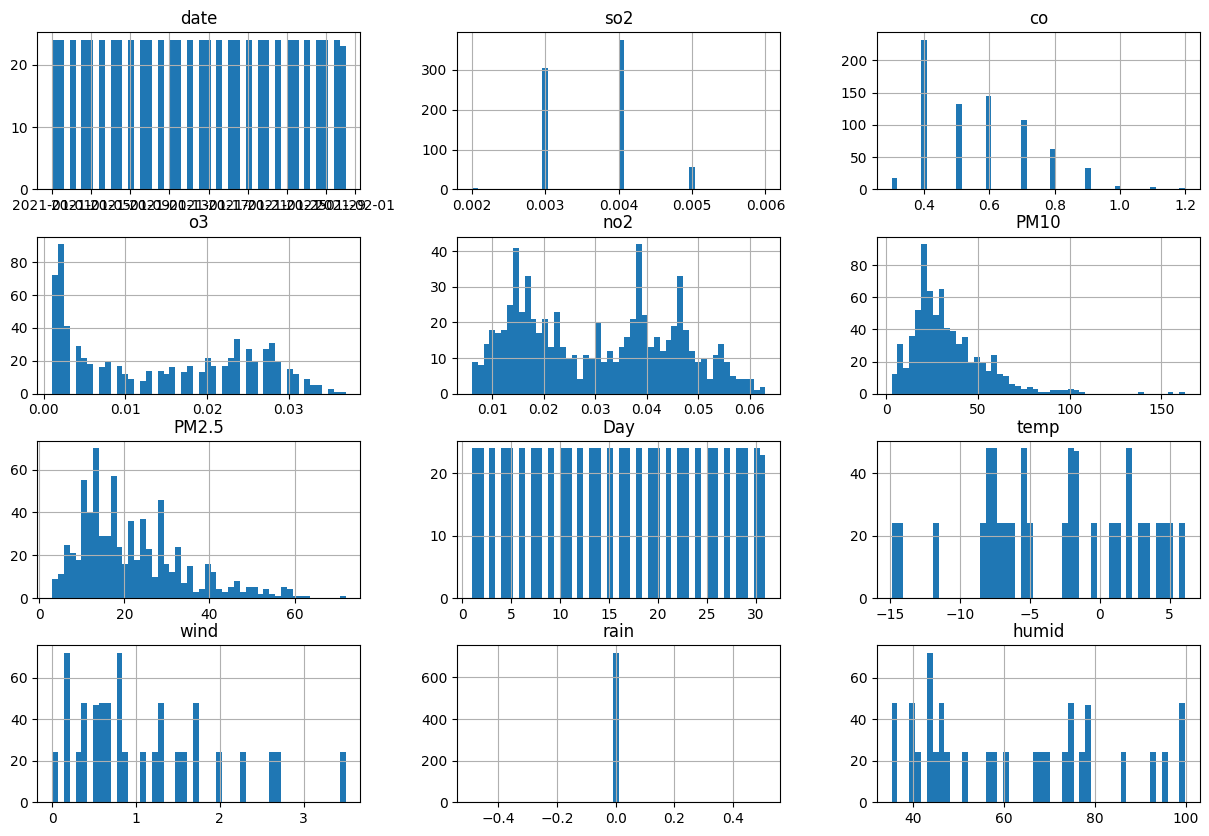

In [ ]:
corr=df.corr()
corr['PM10'].sort_values(ascending=False)

df.hist(bins=50, figsize=(15,10))

/tmp/ipython-input-3993011858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='PM10', data=df, palette='Set1')


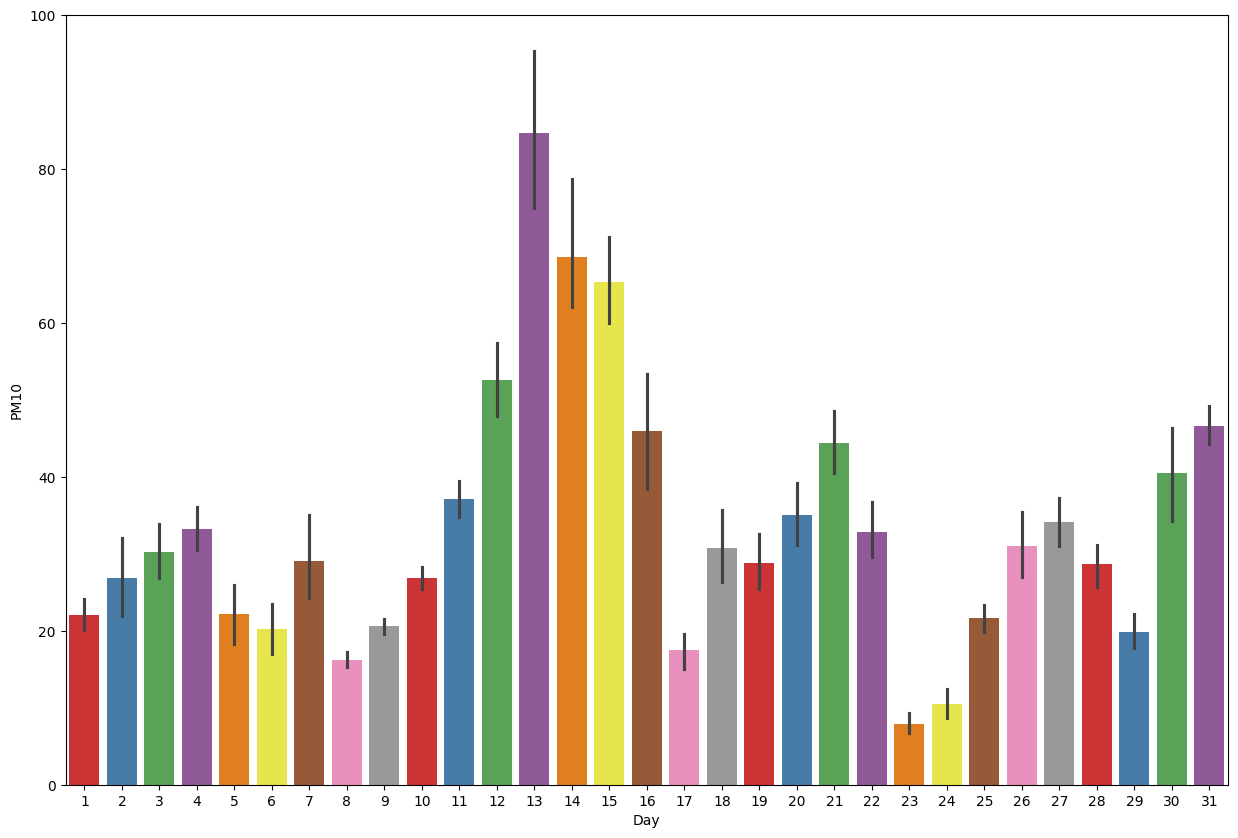

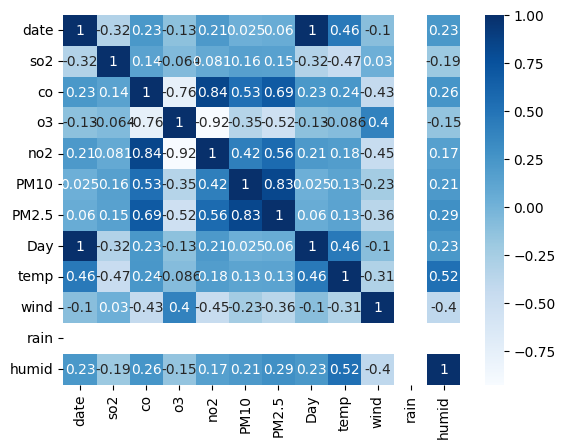

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.barplot(x='Day', y='PM10', data=df, palette='Set1')
plt.xticks(rotation=0)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
1.미세먼지와 초미세먼지는 강한 관계성이 있다
2.미세먼지 변수 중 대기 오염과 변수들과 관련이 있다 (미세먼지 값은 s02, co, o3, no2)
3.일산화탄소와 이산화질소는 강한 관계성이 있다
4.오존과 바람은 조금 관계가 있다
5.기온과 미세먼지는 관계 없다
